Name: Arpan Das

Roll No.: 302211001012

Group: A3

UG3, Information Technology

In [35]:
!pip install opencv-python

#Implement the run-length encoding and decoding techniques.

#Execute the implementation on `text data`

**Google Drive Link For 'input.txt':**  [Link](https://drive.google.com/file/d/1znurWSCx50VTZxcOtOdtKWakTI_tqrPU/view)


In [36]:
import time
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [37]:
def encode_text(input_text):
    encoded_text = []
    row_sizes = []

    for row in input_text:
        if row.strip():
            encoded_row = []
            row_size = 0
            current_symbol = row[0]
            count = 1

            for symbol in row[1:]:
                if symbol == current_symbol:
                    count += 1
                else:
                    encoded_row.extend([current_symbol, count])
                    current_symbol = symbol
                    count = 1
                    row_size += 2

            encoded_row.extend([current_symbol, count])
            encoded_text.append(encoded_row)
            row_size += 2
            row_sizes.append(row_size)

    return encoded_text, row_sizes

Here's a brief overview of how the `encode_text` function works:

1. **Initialization**: The function initializes two lists, `encoded_text` to store the encoded versions of the input text rows, and `row_sizes` to store the sizes of each row.

2. **Encoding Process**: It iterates through each row in the input text. If the row contains non-whitespace characters, it proceeds with encoding.

3. **Run-Length Encoding**: For each non-empty row, the function iterates through the characters, maintaining a count of consecutive occurrences of each symbol. When a different symbol is encountered, it appends the symbol and its count to the encoded row. Additionally, it increments the `row_size` counter to keep track of the size of the row.

4. **Appending Results**: After encoding a row, the encoded row and its size are appended to `encoded_text` and `row_sizes` lists, respectively.

5. **Returning Results**: The function returns the encoded text (`encoded_text`) along with the sizes of each row (`row_sizes`).

In [38]:
def decode_text(encoded_text, row_sizes):
    decoded_text = []

    for r, row_size in enumerate(row_sizes):
        row = []
        c = 0

        while c < row_size:
            current_symbol = encoded_text[r][c]
            frequency = encoded_text[r][c + 1]

            row.extend([current_symbol] * frequency)
            c += 2

        decoded_text.append(row)

    return decoded_text

The function `decode_text` is designed to reverse the process of encoding performed by the `encode_text` function. It takes in two arguments: the `encoded_text`, which contains the run-length encoded representation of the original text, and `row_sizes`, which specifies the sizes of the rows in the encoded text.

Here's a summary of how the function works:

1. **Initialization**: The function initializes an empty list `decoded_text` to store the decoded version of the text.

2. **Decoding Process**: It iterates through each row of the encoded text along with its corresponding row size.

3. **Decompression**: For each row, it iterates through the encoded symbols and their frequencies. It then reconstructs the original text by repeating each symbol according to its frequency.

4. **Appending Results**: The decoded row is appended to the `decoded_text` list.

5. **Returning Results**: Finally, the function returns the decoded text as a list of rows.

In [39]:
with open('input.txt', 'r', encoding='iso-8859-1') as file:
    input_text_data = file.readlines()

input_text_data = [line.strip() for line in input_text_data]

start_time = time.time()
encoded_text, row_sizes = encode_text(input_text_data)
encoding_time = time.time() - start_time

with open('encoded_text.txt', 'w') as file:
    for row in encoded_text:
        file.write(' '.join(map(str, row)) + '\n')

1. **Reading Input Text**: The code opens the file named `input.txt` in read mode with ISO 8859-1 encoding. It then reads the lines of text from the file into a list called `input_text_data`, stripping any leading or trailing whitespace from each line.

2. **Encoding Text**: The `encode_text` function is called with `input_text_data` as input, resulting in the `encoded_text` and `row_sizes` lists. This step performs the run-length encoding of the input text.

3. **Writing Encoded Text to File**: The encoded text data is written to a file named `encoded_text.txt`. Each row of the encoded text is written as space-separated values, with each symbol followed by its count, and each row terminated by a newline character.

4. **Timing Encoding Process**: The code measures the time taken for the encoding process using the `time.time()` function before and after the encoding operation.

In [40]:
decoded_text = decode_text(encoded_text, row_sizes)

with open('decoded_text.txt', 'w') as file:
    for row in decoded_text:
        file.write(''.join(row) + '\n')

1. **Decoding Text**: The `decode_text` function is called with the `encoded_text` and `row_sizes` obtained from the encoding process. This function reverses the run-length encoding, reconstructing the original text data.

2. **Writing Decoded Text to File**: The decoded text data is then written to a file named `decoded_text.txt`. Each row of the decoded text is written as a string with characters concatenated together, and each row is terminated by a newline character.

In [41]:
# Print encoding results

input_file_size = os.path.getsize('input.txt')
encoded_file_size = os.path.getsize('encoded_text.txt')
compression_ratio = input_file_size/encoded_file_size

print("Size of Input File:", input_file_size, "bytes")
print("Size of Encoded File:", encoded_file_size, "bytes")
print("Compression Ratio:", compression_ratio)
print("Encoding Time:", encoding_time, "seconds")

Size of Input File: 70 bytes
Size of Encoded File: 20 bytes
Compression Ratio: 3.5
Encoding Time: 0.00013780593872070312 seconds


#Implementation on `Binary Image`

**Google Drive link of 'chess.png':**   [Link](https://drive.google.com/file/d/1leVY7R2Skw9mKsD2Sr8wYr5hxGPJYa7d/view)

In [42]:
def convert_binary_image_to_text(image_path, output_file):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    with open(output_file, 'w') as file:
        for row in img:
            row_str = ''.join(map(lambda pixel: '1' if pixel == 255 else '0', row))
            file.write(row_str + '\n')

def encode_binary_file(input_file, output_file):
    with open(input_file, 'r') as file_in:
        with open(output_file, 'w') as file_out:
            for row in file_in:
                binary_data = row.strip()
                encoded_data = []
                count = 1
                for i in range(1, len(binary_data)):
                    if binary_data[i] == binary_data[i-1]:
                        count += 1
                    else:
                        encoded_data.append((binary_data[i-1], count))
                        count = 1
                encoded_data.append((binary_data[-1], count))
                for item in encoded_data:
                    file_out.write(f"{item[0]} {item[1]} ")
                file_out.write('\n')

1. `convert_binary_image_to_text`: This function takes an image file path (`image_path`) and an output file path (`output_file`). It reads the image, converts it to grayscale, and then applies a binary threshold to convert it into a binary image. It then iterates over each row of the binary image, converting the pixel values to '1' if they are 255 (white) and '0' otherwise. Finally, it writes the binary representation of the image to the output file.

2. `encode_binary_file`: This function takes an input file path (`input_file`) containing binary data (as '0's and '1's) and an output file path (`output_file`). It reads each row of binary data from the input file, compresses consecutive runs of the same digit using run-length encoding, and writes the encoded data to the output file. Each run of consecutive digits is represented as a tuple containing the digit and its count.


In [43]:
def decode_encoded_file(input_file_path):
    decoded_data = []
    with open(input_file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        line = line.strip().split()
        encoded_data = [(line[i], int(line[i+1])) for i in range(0, len(line), 2)]
        decoded_row = ''
        for pair_idx in range(len(encoded_data)):
            if pair_idx % 2 == 0:
                continue
            bit = '1' if encoded_data[pair_idx][0] == '1' else '0'
            count = encoded_data[pair_idx][1]
            decoded_row += bit * count
        decoded_data.append(decoded_row)

    return decoded_data

def save_image(decoded_data, output_file_path):
    height = len(decoded_data)
    width = max(len(row) for row in decoded_data)

    image = np.zeros((height, width), dtype=np.uint8)
    for i, row in enumerate(decoded_data):
        for j, bit in enumerate(row):
            if j % 2 == 1:
                image[i, j] = int(bit) * 255

    cv2.imwrite(output_file_path, image)

1. `decode_encoded_file`: This function takes an input file path (`input_file_path`) containing compressed binary data in run-length encoded format. It reads the encoded data from the file, decodes each line, and reconstructs the original binary data. It then returns the decoded binary data as a list of strings, where each string represents a row of the decoded image.

2. `save_image`: This function takes the decoded binary data (as a list of strings) and an output file path (`output_file_path`). It determines the dimensions of the image based on the size of the decoded data. Then, it creates a NumPy array representing the image and fills it with pixel values according to the decoded binary data. Finally, it writes the image to the specified output file path using OpenCV.

In [44]:
def decode_binary_file(input_file):
    decoded_data = []
    with open(input_file, 'r') as file:
        lines = file.readlines()

    for line in lines:
        line = line.strip().split()
        encoded_data = [(line[i], int(line[i+1])) for i in range(0, len(line), 2)]
        decoded_row = ''
        for item in encoded_data:
          decoded_row += item[0] * item[1]

        decoded_data.append(decoded_row)

    return decoded_data

def save_image(decoded_data, output_file):
    height = len(decoded_data)
    width = max(len(row) for row in decoded_data)
    image = np.zeros((height, width), dtype=np.uint8)

    for i, row in enumerate(decoded_data):
        for j, bit in enumerate(row):
            image[i, j] = int(bit) * 255

    cv2.imwrite(output_file, image)

1. `decode_binary_file`: This function takes an input file path (`input_file`) containing binary data in a run-length encoded format. It reads the encoded data from the file, decodes each line, and reconstructs the original binary data. It then returns the decoded binary data as a list of strings, where each string represents a row of the decoded image.

2. `save_image`: This function takes the decoded binary data (as a list of strings) and an output file path (`output_file`). It determines the dimensions of the image based on the size of the decoded data. Then, it creates a NumPy array representing the image and fills it with pixel values according to the decoded binary data. Finally, it writes the image to the specified output file path using OpenCV.


In [50]:
start_time = time.time()

binary_image_path = 'chess.png'
output_text_file_path = 'binary_image_text.txt'
convert_binary_image_to_text(binary_image_path, output_text_file_path)

output_compressed_file_path = 'encoded_binary_text.txt'
encode_binary_file(output_text_file_path, output_compressed_file_path)

compression_time = time.time() - start_time

1. **Image Conversion and Compression**:
    - Initially, the script converts a binary image (in this case, 'chess.png') into a textual representation using the `convert_binary_image_to_text` function. This function converts the binary image to a text file containing '0's and '1's, representing pixel values.
    - Following the conversion, the binary data is compressed using a run-length encoding scheme through the `encode_binary_file` function. This generates a compressed binary text file.

2. **Timing Compression Process**:
    - The `time.time()` function is utilized to measure the time taken for the compression process. It captures the start time before the compression begins and calculates the elapsed time once the compression is completed.

3. **Output Paths**:
    - The output paths for the converted binary image text file (`output_text_file_path`) and the compressed binary text file (`output_compressed_file_path`) are specified.

4. **Compression Time**:
    - The `compression_time` variable captures the duration of the compression process by subtracting the start time from the current time after compression.

Encoded Binary Image Graph: 


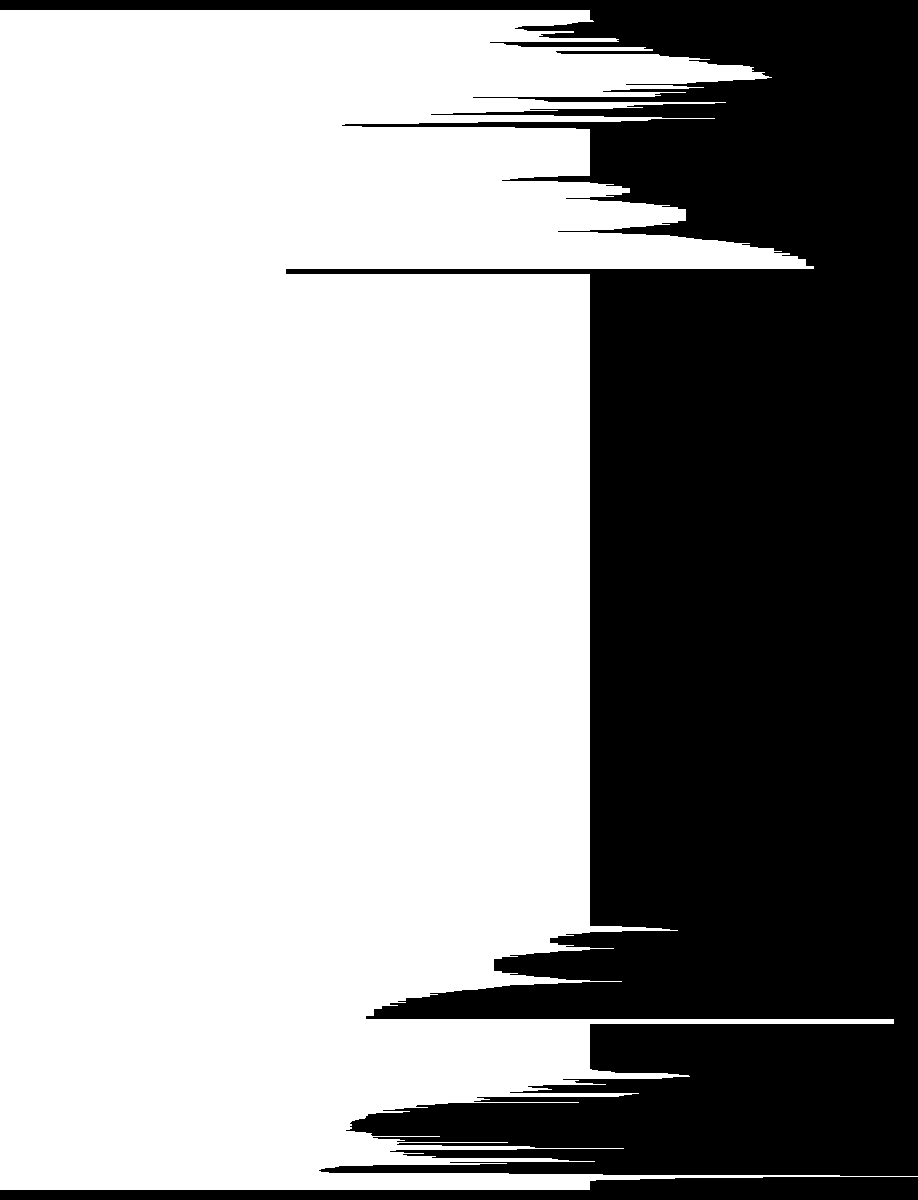

In [46]:
# Print the encoded text as image

decoded_data = decode_encoded_file(output_compressed_file_path)
compressed_binary_graph_path = 'encoded_binary_graph.png'
save_image(decoded_data, compressed_binary_graph_path)

print("Encoded Binary Image Graph: ")
img = cv2.imread(compressed_binary_graph_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Decoded Binary Image: 


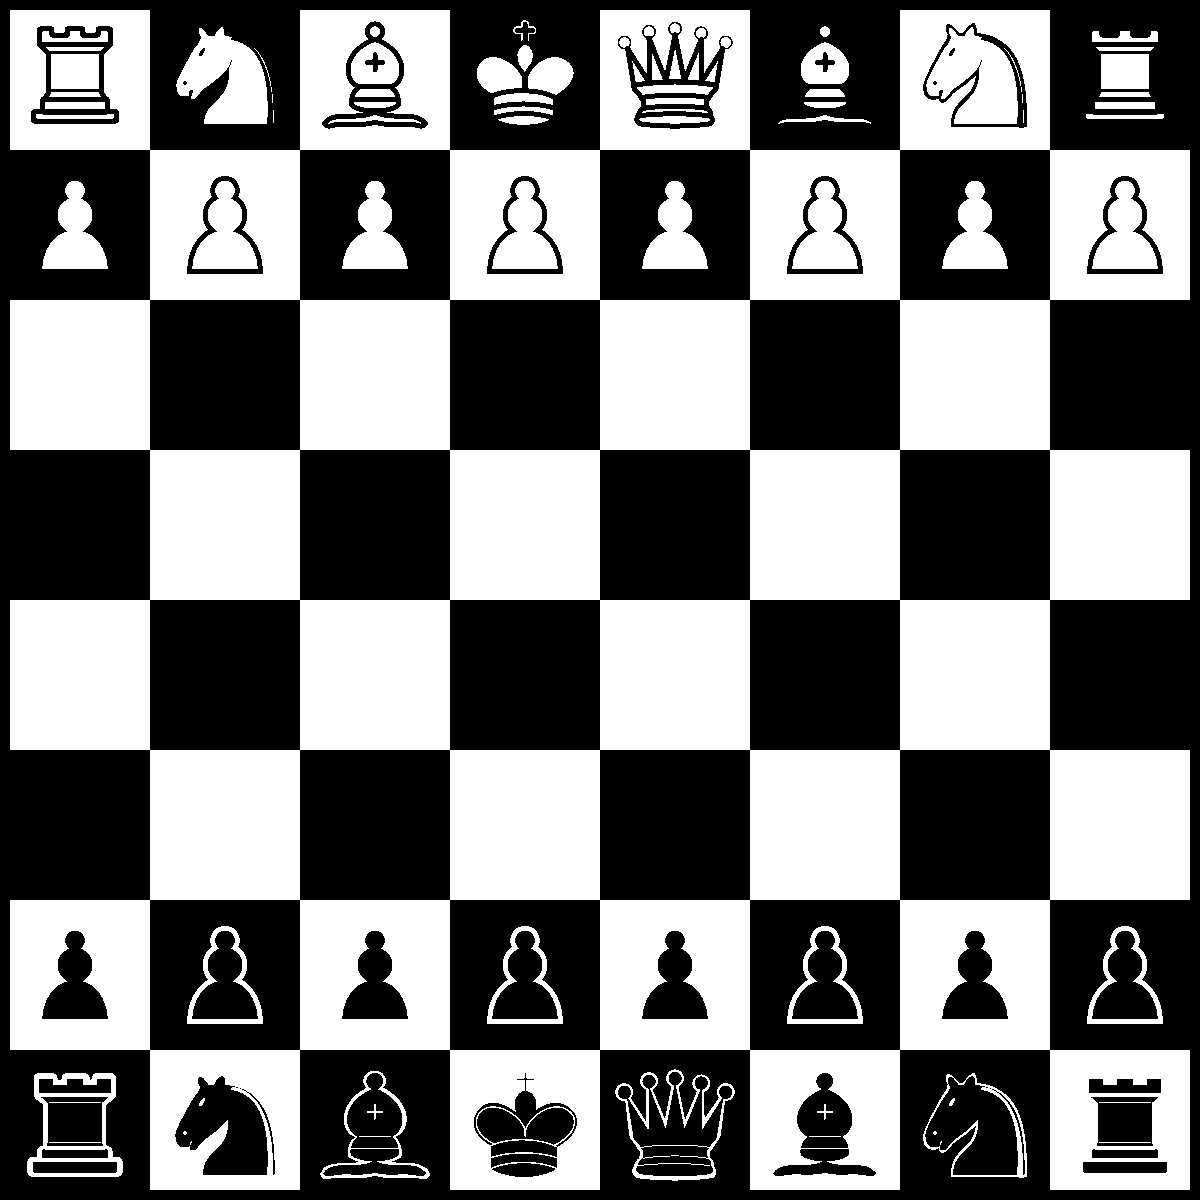

In [47]:
# Print the decoded image

decoded_data = decode_binary_file(output_compressed_file_path)
output_image_file_path = 'decoded_binary_image.png'
save_image(decoded_data, output_image_file_path)

print("Decoded Binary Image: ")
img = cv2.imread(output_image_file_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [48]:
#Print encoding results

input_size = os.path.getsize(output_text_file_path)
compressed_size = os.path.getsize(output_compressed_file_path)
compression_ratio = input_size / compressed_size

print("Size of Input File:", input_size, "bytes")
print("Size of Compressed File:", compressed_size, "bytes")
print("Compression Ratio:", compression_ratio)
print("Compression Time:", compression_time, "seconds")

Size of Input File: 1441200 bytes
Size of Compressed File: 117436 bytes
Compression Ratio: 12.27221635614292
Compression Time: 3.8719229698181152 seconds


#Implementation on `8-bit Grayscale Image`

**Google Drive Link of 'grayscale.png:** [Link](https://drive.google.com/file/d/1RHDvk3lM5njnO1hO_kRjB3C0yc_XMzEn/view)

In [49]:
def grayscale_to_text(image_path, output_txt):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    with open(output_txt, 'w') as file:
        for row in image:
            for pixel in row:
                file.write(f"{pixel} ")
            file.write('\n')

def encode_grayscale_image(input_file, output_encoded_file):
    with open(input_file, 'r') as file:
        lines = file.readlines()

    with open(output_encoded_file, 'w') as outfile:
        for line in lines:
            row = [int(x) for x in line.split()]
            encoded_row = []
            count = 1
            for i in range(1, len(row)):
                if row[i] == row[i - 1]:
                    count += 1
                else:
                    encoded_row.extend([row[i - 1], count])
                    count = 1
            encoded_row.extend([row[-1], count])

            for item in encoded_row:
                outfile.write(f"{item} ")
            outfile.write('\n')

**1. `grayscale_to_text(image_path, output_txt)`**
- This function takes the path to a grayscale image and an output text file as input.
- It reads the image and writes the pixel values of each row into the output text file, separated by spaces.

**2. `encode_grayscale_image(input_file, output_encoded_file)`**
- This function takes a text file containing grayscale pixel values and an output file path for the encoded data.
- It reads each line from the input text file, representing a row of pixel values.
- The function encodes each row using a run-length encoding technique to reduce redundancy in consecutive pixel values.
- The encoded rows are written to the output file, with each pixel value followed by its count, separated by spaces.


In [ ]:
def display_encoded_image(input_file, output_image_file):
    decoded_data = []
    with open(input_file, 'r') as file:
        lines = file.readlines()

    for line in lines:
        encoded_row = [int(x) for x in line.split()]
        decoded_row = []
        for i in range(0, len(encoded_row), 2):
            pixel_value = encoded_row[i]
            decoded_row.append(pixel_value)
        decoded_data.append(decoded_row)

    max_length = max(len(row) for row in decoded_data)
    padded_data = []
    for row in decoded_data:
        padded_row = row + [row[-1]] * (max_length - len(row))
        padded_data.append(padded_row)

    image_data = np.array(padded_data, dtype=np.uint8)
    cv2.imwrite(output_image_file, image_data)

1. **Input Parsing:** It reads the input text file containing encoded pixel values and their counts, each row representing a line of the image.
2. **Decoding:** The function decodes the encoded pixel values to reconstruct the original pixel values for each row.
3. **Padding:** Since the encoding may result in rows of different lengths, the function pads each row with the last pixel value to ensure uniformity.
4. **Image Construction:** It constructs an image array using the decoded and padded pixel values.
5. **Output:** The constructed image array is saved as an image file specified by the output file path.


In [ ]:
def decode_grayscale_image(input_file):
    decoded_data = []
    with open(input_file, 'r') as file:
        lines = file.readlines()

    for line in lines:
        encoded_row = [int(x) for x in line.split()]
        decoded_row = []
        for i in range(0, len(encoded_row), 2):
          pixel_value = encoded_row[i]
          count = encoded_row[i + 1]
          decoded_row.extend([pixel_value] * count)
        decoded_data.append(decoded_row)

    return decoded_data


1. **Input Parsing:** It reads the input text file containing encoded pixel values and their counts, each row representing a line of the image.
2. **Decoding:** The function iterates through each line of the input file, decoding the encoded pixel values and counts.
3. **Reconstruction:** For each encoded row, it reconstructs the original pixel values by replicating each pixel value according to its count.
4. **Output:** The decoded pixel values are stored in a list, representing the original grayscale image data.

In [51]:
start_time = time.time()
input_image_path = 'grayscale.png'
output_txt_file = 'grayscale_image_text.txt'
grayscale_to_text(input_image_path, output_txt_file)

encoded_grayscale_file = 'encoded_grayscale_output.txt'
encode_grayscale_image(output_txt_file, encoded_grayscale_file)

compression_time = time.time() - start_time

Encoded Grayscale Image


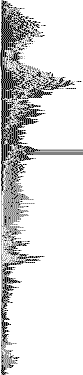

In [52]:
compressed_image = 'encoded_grascale_image.png'
display_encoded_image(encoded_grayscale_file, compressed_image)

print("Encoded Grayscale Image")
img = cv2.imread(compressed_image, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)


1. **Encoding:** The original grayscale image is encoded using a run-length encoding technique, resulting in a compressed representation stored in a text file.
2. **Display:** The `display_encoded_image` function decodes the compressed image from the text file and saves it as a PNG file. This function ensures that the decoded image is correctly formatted and displayed.
3. **Visualization:** The code snippet then utilizes OpenCV to load and display the compressed grayscale image. It showcases the compressed image using the `cv2_imshow` function, allowing users to visualize the compressed image.


Decoded Grayscale Image:


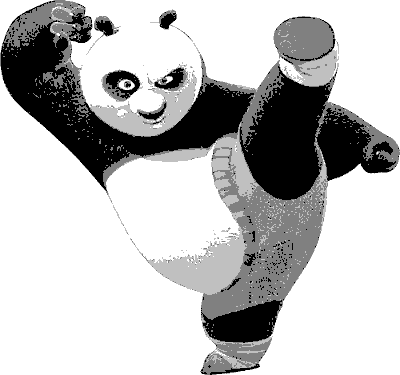

In [53]:
output_image_file = 'decoded_grayscale_image.png'

decoded_data = decode_grayscale_image(encoded_grayscale_file)
image = np.array(decoded_data, dtype=np.uint8)
cv2.imwrite(output_image_file, image)

print("Decoded Grayscale Image:")
img = cv2.imread(output_image_file, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)


1. **Decoding:** The encoded grayscale image, stored in a text file, is decoded using the `decode_grayscale_image` function. This function reconstructs the original pixel values from the encoded data.
2. **Image Reconstruction:** The decoded pixel values are converted into a NumPy array, representing the decompressed grayscale image.
3. **Saving:** The decompressed image array is saved as a PNG file using OpenCV's `cv2.imwrite` function.

**Visualization:**
- After decompression and saving, the code snippet displays the decompressed grayscale image using OpenCV's `cv2_imshow` function. This allows users to visually inspect the quality of the decompressed image.

In [54]:
#Print encoding results

input_size = os.path.getsize(input_image_path)
compressed_size = os.path.getsize(compressed_image)
compression_ratio = input_size / compressed_size

print("Size of Input image:", input_size, "bytes")
print("Size of encoded image", compressed_size, "bytes")
print("Compression Ratio:", compression_ratio)
print("Compression Time:", compression_time, "seconds")

Size of Input image: 8413 bytes
Size of encoded image 4150 bytes
Compression Ratio: 2.0272289156626506
Compression Time: 0.13949012756347656 seconds
